In [1]:
from dataload import customLoader
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as plt
data_loader = customLoader()
x_train, x_test, y_train, y_test, origin = data_loader.load_data()

c:\Users\KKT\k-water\aiffel\10_project


c:\Users\KKT\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
len(origin['neighbourhood_group'].unique()), len(x_train['neighbourhood_group'].unique())

(5, 5)

In [3]:
len(origin['neighbourhood'].unique()), len(x_train['neighbourhood'].unique())

(221, 221)

In [4]:
len(origin['room_type'].unique()), len(x_train['room_type'].unique())

(3, 3)

In [5]:
origin.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

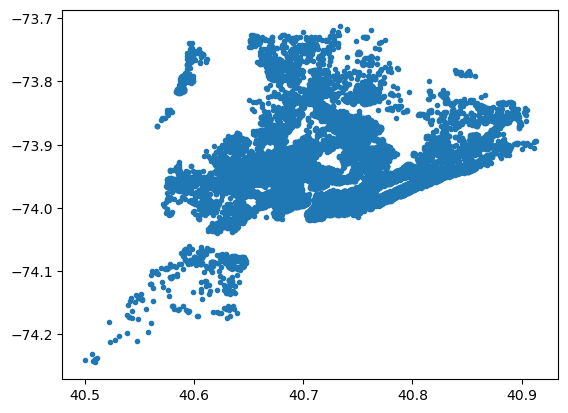

In [8]:
plt.plot(origin['latitude'], origin['longitude'], '.')

In [10]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

mms = MinMaxScaler()
coord_df = pd.DataFrame()
coord_df['latitude'] = origin['latitude']
coord_df['longitude'] = origin['longitude']
coord_df

,latitude,longitude
0,40.64749,-73.97237
1,40.75362,-73.98377
2,40.80902,-73.94190
3,40.68514,-73.95976
4,40.79851,-73.94399
...,...,...
48890,40.67853,-73.94995
48891,40.70184,-73.93317
48892,40.81475,-73.94867
48893,40.75751,-73.99112


In [12]:
coord_df = mms.fit_transform(coord_df)
coord_df

array([[0.35739347, 0.51192067],
       [0.61419895, 0.49046911],
       [0.74825175, 0.56925653],
       ...,
       [0.76211678, 0.55651732],
       [0.62361168, 0.4766385 ],
       [0.63941249, 0.48000677]])

In [14]:
data = origin.copy()
data['latitude'] = coord_df[:, 0]
data['longitude'] = coord_df[:, 1]
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,0.357393,0.511921,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,0.614199,0.490469,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,0.748252,0.569257,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,0.448496,0.535649,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,0.722820,0.565324,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,0.432502,0.554109,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,0.488906,0.585684,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,0.762117,0.556517,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,0.623612,0.476639,Shared room,55,1,0,NaN,NaN,6,2


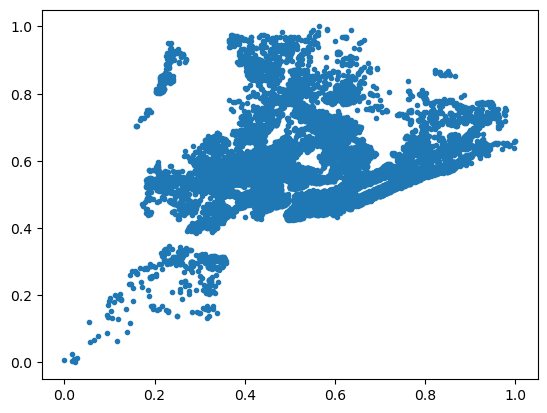

In [16]:
plt.plot(data['latitude'], data['longitude'], '.')

In [19]:
data[data['neighbourhood_group'] == 'Brooklyn']

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,0.357393,0.511921,Private room,149,1,9,2018-10-19,0.21,6,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,0.448496,0.535649,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,0.452706,0.542800,Private room,60,45,49,2017-10-05,0.40,1,0
12,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,0.407724,0.482905,Private room,89,4,167,2019-06-24,1.34,3,314
15,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,0.504706,0.547391,Entire home/apt,140,2,148,2019-06-29,1.20,1,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48882,36482231,Bushwick _ Myrtle-Wyckoff,66058896,Luisa,Brooklyn,Bushwick,0.476033,0.627797,Private room,40,20,0,NaN,NaN,1,31
48884,36482783,Brooklyn Oasis in the heart of Williamsburg,274307600,Jonathan,Brooklyn,Williamsburg,0.527766,0.530719,Private room,190,7,0,NaN,NaN,1,341
48887,36483152,Garden Jewel Apartment in Williamsburg New York,208514239,Melki,Brooklyn,Williamsburg,0.514264,0.568692,Entire home/apt,170,1,0,NaN,NaN,3,365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,0.432502,0.554109,Private room,70,2,0,NaN,NaN,2,9


In [21]:
data[data['neighbourhood_group'] == 'Brooklyn']['neighbourhood'].value_counts()

Williamsburg                 3920
Bedford-Stuyvesant           3714
Bushwick                     2465
Crown Heights                1564
Greenpoint                   1115
Flatbush                      621
Clinton Hill                  572
Prospect-Lefferts Gardens     535
Park Slope                    506
East Flatbush                 500
Fort Greene                   489
Sunset Park                   390
Prospect Heights              357
South Slope                   284
Gowanus                       247
Carroll Gardens               233
East New York                 218
Boerum Hill                   177
Kensington                    175
Sheepshead Bay                164
Windsor Terrace               157
Brooklyn Heights              154
Canarsie                      147
Bay Ridge                     141
Borough Park                  136
Cypress Hills                 135
Midwood                       109
Cobble Hill                    99
Downtown Brooklyn              83
Flatlands     

In [25]:
data[data['neighbourhood_group'] == 'Bronx'].sort_values('price')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,0.806180,0.673165,Private room,0,2,55,2019-06-24,2.56,4,127
34446,27316669,Bronx Apart,205820814,Luz,Bronx,Highbridge,0.810003,0.596334,Private room,10,1,0,NaN,NaN,1,180
39962,31053045,Sleeper shared rm on subway bronx zoo 30m2NYC,1532337,Monica,Bronx,Van Nest,0.825320,0.704740,Shared room,20,10,3,2019-07-01,0.68,4,25
30073,23164537,Shared studio apartment,172186369,Elisheva,Bronx,Morris Heights,0.840588,0.622170,Shared room,20,1,9,2018-05-21,0.53,1,0
39926,31032487,Share Lg studio rm b2*2 blocks subway *Bronx Zoo,1532337,Monica,Bronx,Van Nest,0.826094,0.703630,Shared room,20,10,2,2019-06-30,0.32,4,114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38433,30253236,SedaOn2 Dance Studio,140862407,Angelie,Bronx,Westchester Square,0.832361,0.752178,Entire home/apt,670,1,2,2019-03-31,0.34,1,178
8521,6557289,1 Room in a 2 Bedroom Available,7074531,Jonathan,Bronx,Longwood,0.790282,0.641270,Private room,680,1,0,NaN,NaN,1,0
25422,20330081,New York's Hidden Secret for luxury living,131826530,Kathy,Bronx,Riverdale,0.932465,0.621549,Shared room,800,2,1,2017-09-03,0.04,3,269
48282,36177241,VJ'S 5 HOUR YACHT TOUR,23732730,Buddy,Bronx,City Island,0.833934,0.864554,Entire home/apt,1000,1,0,NaN,NaN,4,90


In [36]:
data['neighbourhood_group']

0         Brooklyn
1        Manhattan
2        Manhattan
3         Brooklyn
4        Manhattan
           ...    
48890     Brooklyn
48891     Brooklyn
48892    Manhattan
48893    Manhattan
48894    Manhattan
Name: neighbourhood_group, Length: 48895, dtype: object

In [29]:
data['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [27]:
data = data.drop('last_review', axis=1)
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,0.357393,0.511921,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,0.614199,0.490469,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,0.748252,0.569257,Private room,150,3,0,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,0.448496,0.535649,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,0.722820,0.565324,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,0.432502,0.554109,Private room,70,2,0,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,0.488906,0.585684,Private room,40,4,0,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,0.762117,0.556517,Entire home/apt,115,10,0,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,0.623612,0.476639,Shared room,55,1,0,NaN,6,2


In [28]:
data.groupby('room_type').mean()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
room_type,,,,,,,,,,
Entire home/apt,1.843818e+07,6.175593e+07,0.553777,0.533888,211.794246,8.506907,22.842418,1.306578,10.698335,111.920304
Private room,1.946893e+07,7.247514e+07,0.555130,0.567329,89.780973,5.377900,24.112962,1.445209,3.227717,111.203933
Shared room,2.300378e+07,1.026241e+08,0.558288,0.566542,70.127586,6.475000,16.600000,1.471726,4.662931,162.000862


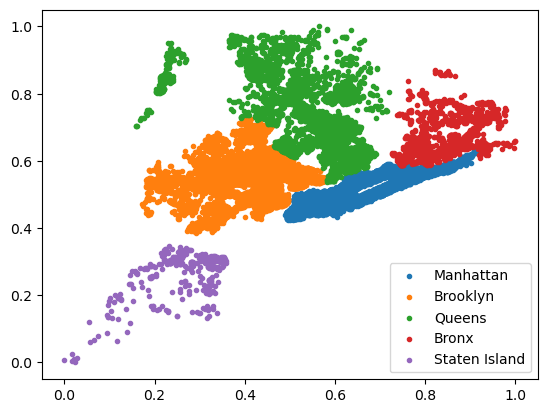

In [40]:
plt.scatter(data['latitude'][data['neighbourhood_group']=='Manhattan'], data['longitude'][data['neighbourhood_group']=='Manhattan'], label='Manhattan', marker='.')
plt.scatter(data['latitude'][data['neighbourhood_group']=='Brooklyn'], data['longitude'][data['neighbourhood_group']=='Brooklyn'], label='Brooklyn', marker='.')
plt.scatter(data['latitude'][data['neighbourhood_group']=='Queens'], data['longitude'][data['neighbourhood_group']=='Queens'], label='Queens', marker='.')
plt.scatter(data['latitude'][data['neighbourhood_group']=='Bronx'], data['longitude'][data['neighbourhood_group']=='Bronx'], label='Bronx', marker='.')
plt.scatter(data['latitude'][data['neighbourhood_group']=='Staten Island'], data['longitude'][data['neighbourhood_group']=='Staten Island'], label='Staten Island', marker='.')
plt.legend()

In [39]:
data.groupby('neighbourhood_group').mean().sort_values('price', ascending=False)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group,,,,,,,,,,
Manhattan,1.877494e+07,6.783062e+07,0.641886,0.507712,196.875814,8.579151,20.985596,1.272131,12.791330,111.979410
Brooklyn,1.825685e+07,5.671526e+07,0.448245,0.551775,124.383207,6.056556,24.202845,1.283212,2.284371,100.232292
Staten Island,2.159747e+07,9.853360e+07,0.267222,0.260833,114.812332,4.831099,30.941019,1.872580,2.319035,199.678284
Queens,2.175500e+07,9.615680e+07,0.560750,0.699331,99.517649,5.181433,27.700318,1.941200,4.060184,144.451818
Bronx,2.273492e+07,1.056099e+08,0.843311,0.677170,87.496792,4.560953,26.004583,1.837831,2.233731,165.758937


In [54]:
data[data['neighbourhood_group']=='Manhattan'].groupby('neighbourhood').mean().sort_values('price', ascending=True)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood,,,,,,,,,,
Inwood,1.842674e+07,6.096981e+07,0.884473,0.601584,88.896825,5.388889,18.611111,0.948522,2.301587,98.547619
Marble Hill,1.712544e+07,6.782704e+07,0.909698,0.627329,89.166667,2.583333,14.000000,0.724000,1.500000,114.666667
Washington Heights,1.844179e+07,6.498787e+07,0.834092,0.575915,89.610679,6.530590,19.088988,1.215950,1.927697,98.932147
Roosevelt Island,1.939699e+07,7.799377e+07,0.637581,0.556732,113.259740,6.571429,15.766234,1.060152,1.259740,72.584416
Morningside Heights,1.729092e+07,5.244126e+07,0.746610,0.531889,114.783237,5.716763,13.291908,0.991508,1.421965,43.054913
Harlem,1.772530e+07,5.996744e+07,0.765203,0.557768,118.974041,6.414597,28.578631,1.340086,2.189240,106.577502
Two Bridges,1.990251e+07,6.742705e+07,0.512830,0.467869,127.069444,4.875000,29.569444,2.395500,1.555556,86.236111
East Harlem,1.888549e+07,6.868314e+07,0.717094,0.568532,133.198747,5.857654,32.628469,1.672733,2.386750,98.973142
Chinatown,1.802833e+07,5.627278e+07,0.522248,0.471395,161.497283,5.673913,27.013587,1.369190,1.497283,90.796196


In [59]:
data[data['neighbourhood_group']=='Brooklyn'].groupby('neighbourhood').mean().sort_values('price', ascending=False)
temp_df = data[data['neighbourhood_group']=='Brooklyn'].groupby('neighbourhood').mean().sort_values('price', ascending=False)
temp_df

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood,,,,,,,,,,
Sea Gate,2.017955e+07,1.168665e+08,0.187114,0.443520,487.857143,4.142857,1.428571,0.330000,1.857143,65.571429
Cobble Hill,1.545593e+07,4.152201e+07,0.453644,0.468296,211.929293,7.383838,29.171717,1.204886,1.171717,63.212121
Brooklyn Heights,1.685823e+07,3.492239e+07,0.471855,0.470609,209.064935,7.525974,16.590909,0.891048,1.077922,66.038961
DUMBO,1.731385e+07,6.407364e+07,0.492356,0.482700,196.305556,7.666667,38.388889,1.377083,7.666667,114.472222
Vinegar Hill,1.896932e+07,6.110440e+07,0.488196,0.491332,187.176471,18.352941,16.029412,0.829615,1.264706,79.529412
Clinton Hill,1.552119e+07,3.395404e+07,0.455693,0.526917,181.893357,6.692308,25.500000,0.972917,1.744755,95.013986
Mill Basin,2.625635e+07,1.811127e+08,0.272443,0.618275,179.750000,2.250000,17.250000,2.127500,1.000000,290.000000
Park Slope,1.434887e+07,3.480845e+07,0.421948,0.499532,176.312253,8.608696,28.928854,1.059049,1.387352,88.786561
Boerum Hill,1.547914e+07,3.276790e+07,0.451523,0.487240,176.135593,7.751412,24.265537,1.006463,2.152542,77.271186


In [60]:
temp_df.index

Index(['Sea Gate', 'Cobble Hill', 'Brooklyn Heights', 'DUMBO', 'Vinegar Hill',
       'Clinton Hill', 'Mill Basin', 'Park Slope', 'Boerum Hill',
       'Carroll Gardens', 'Prospect Heights', 'Columbia St', 'Gowanus',
       'Navy Yard', 'Fort Greene', 'Downtown Brooklyn', 'South Slope',
       'Greenpoint', 'Bay Ridge', 'Williamsburg', 'Red Hook',
       'Windsor Terrace', 'Brighton Beach', 'Cypress Hills', 'Flatlands',
       'Coney Island', 'Sunset Park', 'Crown Heights',
       'Prospect-Lefferts Gardens', 'Bedford-Stuyvesant', 'Bergen Beach',
       'Sheepshead Bay', 'Canarsie', 'East Flatbush', 'Manhattan Beach',
       'Fort Hamilton', 'Dyker Heights', 'Kensington', 'Flatbush',
       'East New York', 'Bushwick', 'Bath Beach', 'Midwood', 'Gravesend',
       'Brownsville', 'Bensonhurst', 'Borough Park'],
      dtype='object', name='neighbourhood')

In [63]:
brooklyn_encoding = []
count = 0
for idx, elem in data.iterrows():
    for encode_num, location in enumerate(temp_df.index):
        if elem.neighbourhood == location:
            data['neighbourhood'][idx] = encode_num
            break
data

C:\Users\KKT\AppData\Local\Temp\ipykernel_21964\179897227.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['neighbourhood'][idx] = encode_num


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,37,0.357393,0.511921,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,0.614199,0.490469,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,0.748252,0.569257,Private room,150,3,0,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,5,0.448496,0.535649,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,0.722820,0.565324,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,29,0.432502,0.554109,Private room,70,2,0,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,40,0.488906,0.585684,Private room,40,4,0,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,0.762117,0.556517,Entire home/apt,115,10,0,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,0.623612,0.476639,Shared room,55,1,0,NaN,6,2


In [65]:
data[data['neighbourhood_group']=='Manhattan'].groupby('neighbourhood').mean().sort_values('price', ascending=True)
temp_df = data[data['neighbourhood_group']=='Manhattan'].groupby('neighbourhood').mean().sort_values('price', ascending=True)
temp_df

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood,,,,,,,,,,
Inwood,1.842674e+07,6.096981e+07,0.884473,0.601584,88.896825,5.388889,18.611111,0.948522,2.301587,98.547619
Marble Hill,1.712544e+07,6.782704e+07,0.909698,0.627329,89.166667,2.583333,14.000000,0.724000,1.500000,114.666667
Washington Heights,1.844179e+07,6.498787e+07,0.834092,0.575915,89.610679,6.530590,19.088988,1.215950,1.927697,98.932147
Roosevelt Island,1.939699e+07,7.799377e+07,0.637581,0.556732,113.259740,6.571429,15.766234,1.060152,1.259740,72.584416
Morningside Heights,1.729092e+07,5.244126e+07,0.746610,0.531889,114.783237,5.716763,13.291908,0.991508,1.421965,43.054913
Harlem,1.772530e+07,5.996744e+07,0.765203,0.557768,118.974041,6.414597,28.578631,1.340086,2.189240,106.577502
Two Bridges,1.990251e+07,6.742705e+07,0.512830,0.467869,127.069444,4.875000,29.569444,2.395500,1.555556,86.236111
East Harlem,1.888549e+07,6.868314e+07,0.717094,0.568532,133.198747,5.857654,32.628469,1.672733,2.386750,98.973142
Chinatown,1.802833e+07,5.627278e+07,0.522248,0.471395,161.497283,5.673913,27.013587,1.369190,1.497283,90.796196


In [66]:
manhattan_encoding = []
count = 0
for idx, elem in data.iterrows():
    for encode_num, location in enumerate(temp_df.index):
        if elem.neighbourhood == location:
            data['neighbourhood'][idx] = encode_num
            break
data

C:\Users\KKT\AppData\Local\Temp\ipykernel_21964\179897227.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['neighbourhood'][idx] = encode_num


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,37,0.357393,0.511921,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,26,0.614199,0.490469,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,5,0.748252,0.569257,Private room,150,3,0,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,5,0.448496,0.535649,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,7,0.722820,0.565324,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,29,0.432502,0.554109,Private room,70,2,0,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,40,0.488906,0.585684,Private room,40,4,0,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,5,0.762117,0.556517,Entire home/apt,115,10,0,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,15,0.623612,0.476639,Shared room,55,1,0,NaN,6,2


In [67]:
temp_df = data[data['neighbourhood_group']=='Staten Island'].groupby('neighbourhood').mean().sort_values('price', ascending=True)
temp_df

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood,,,,,,,,,,
Bull's Head,2.932781e+07,1.473616e+08,0.245263,0.146865,47.333333,12.166667,15.333333,2.423333,2.333333,165.666667
New Dorp,2.359732e+07,9.927067e+07,0.170954,0.238884,57.000000,1.000000,0.000000,NaN,1.000000,0.000000
New Dorp Beach,2.894558e+07,1.699417e+08,0.157374,0.267761,57.400000,2.000000,14.800000,5.500000,1.400000,174.400000
Grant City,2.797084e+07,1.691085e+08,0.191497,0.254201,57.666667,6.666667,26.833333,2.422500,2.333333,240.333333
Concord,2.040039e+07,9.841185e+07,0.247349,0.301514,58.192308,5.153846,24.923077,1.512500,4.884615,255.576923
Arden Heights,2.935619e+07,1.695545e+08,0.127326,0.116982,67.250000,9.500000,7.750000,1.040000,1.000000,94.250000
Emerson Hill,2.130112e+07,9.052911e+07,0.259811,0.219050,68.200000,1.600000,11.200000,1.866667,1.400000,80.800000
Graniteville,1.809491e+07,1.190618e+08,0.297723,0.148028,68.666667,2.666667,41.000000,1.533333,1.000000,163.000000
Silver Lake,1.582589e+07,7.543765e+07,0.299090,0.278343,70.000000,2.500000,118.500000,4.340000,1.000000,162.000000


In [68]:
Staten_encoding = []
count = 0
for idx, elem in data.iterrows():
    for encode_num, location in enumerate(temp_df.index):
        if elem.neighbourhood == location:
            data['neighbourhood'][idx] = encode_num
            break
data

C:\Users\KKT\AppData\Local\Temp\ipykernel_21964\250551442.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['neighbourhood'][idx] = encode_num


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,37,0.357393,0.511921,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,26,0.614199,0.490469,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,5,0.748252,0.569257,Private room,150,3,0,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,5,0.448496,0.535649,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,7,0.722820,0.565324,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,29,0.432502,0.554109,Private room,70,2,0,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,40,0.488906,0.585684,Private room,40,4,0,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,5,0.762117,0.556517,Entire home/apt,115,10,0,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,15,0.623612,0.476639,Shared room,55,1,0,NaN,6,2


In [69]:
temp_df = data[data['neighbourhood_group']=='Queens'].groupby('neighbourhood').mean().sort_values('price', ascending=True)
temp_df

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood,,,,,,,,,,
Corona,2.370219e+07,1.329123e+08,0.588262,0.721487,59.171875,2.265625,28.218750,2.006610,3.453125,244.171875
Woodhaven,2.565286e+07,1.041632e+08,0.465017,0.726695,67.170455,2.795455,31.727273,2.262778,3.738636,200.920455
Little Neck,2.772940e+07,2.648758e+07,0.641005,0.967969,75.200000,1.800000,3.800000,0.333333,2.600000,81.200000
Rosedale,2.425361e+07,1.486083e+08,0.386379,0.959607,76.694915,3.542373,28.355932,2.680392,2.084746,177.949153
Ridgewood,2.204207e+07,8.982384e+07,0.494320,0.636994,77.184397,8.004728,18.387707,1.416250,3.075650,114.425532
Elmhurst,2.330024e+07,9.340577e+07,0.581088,0.688170,80.459916,6.691983,23.434599,1.643763,8.649789,128.396624
Jackson Heights,2.172298e+07,9.640469e+07,0.609658,0.682842,80.897849,4.983871,27.209677,1.832937,5.053763,150.279570
East Elmhurst,2.401785e+07,1.356191e+08,0.636373,0.688218,81.183784,1.805405,81.659459,4.822982,2.616216,169.491892
Cambria Heights,2.326422e+07,1.566228e+08,0.469408,0.956852,81.730769,2.192308,18.653846,2.057500,1.461538,144.115385


In [70]:
Staten_encoding = []
count = 0
for idx, elem in data.iterrows():
    for encode_num, location in enumerate(temp_df.index):
        if elem.neighbourhood == location:
            data['neighbourhood'][idx] = encode_num
            break
data

C:\Users\KKT\AppData\Local\Temp\ipykernel_21964\250551442.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['neighbourhood'][idx] = encode_num


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,37,0.357393,0.511921,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,26,0.614199,0.490469,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,5,0.748252,0.569257,Private room,150,3,0,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,5,0.448496,0.535649,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,7,0.722820,0.565324,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,29,0.432502,0.554109,Private room,70,2,0,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,40,0.488906,0.585684,Private room,40,4,0,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,5,0.762117,0.556517,Entire home/apt,115,10,0,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,15,0.623612,0.476639,Shared room,55,1,0,NaN,6,2


In [71]:
temp_df = data[data['neighbourhood_group']=='Bronx'].groupby('neighbourhood').mean().sort_values('price', ascending=True)
temp_df

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood,,,,,,,,,,
Hunts Point,2.314122e+07,1.035213e+08,0.763985,0.670515,50.500000,13.777778,9.777778,1.261875,3.555556,239.166667
Tremont,1.766927e+07,1.082147e+08,0.832117,0.664446,51.545455,2.363636,20.636364,1.244000,1.818182,119.000000
Soundview,2.170517e+07,1.095263e+08,0.791566,0.704716,53.466667,2.133333,29.400000,2.273077,1.800000,133.666667
Bronxdale,2.190473e+07,1.105278e+08,0.858860,0.711538,57.105263,2.894737,24.105263,1.916875,1.105263,145.421053
Mount Eden,1.655559e+07,8.005147e+07,0.828208,0.617049,58.500000,1.833333,70.000000,1.784000,1.000000,136.166667
Woodlawn,2.189746e+07,8.643503e+07,0.962158,0.708430,60.090909,1.454545,44.000000,2.374545,1.727273,98.272727
Castle Hill,3.304754e+07,2.257518e+08,0.767292,0.747831,63.000000,2.333333,13.111111,2.775000,5.666667,159.333333
Olinville,2.665384e+07,1.360087e+08,0.928848,0.714882,64.000000,23.500000,7.500000,1.435000,1.000000,172.500000
Parkchester,2.409896e+07,1.133769e+08,0.812689,0.716083,69.076923,4.538462,23.358974,1.545313,1.743590,140.435897


In [72]:
Staten_encoding = []
count = 0
for idx, elem in data.iterrows():
    for encode_num, location in enumerate(temp_df.index):
        if elem.neighbourhood == location:
            data['neighbourhood'][idx] = encode_num
            break

C:\Users\KKT\AppData\Local\Temp\ipykernel_21964\2992684582.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['neighbourhood'][idx] = encode_num


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  reviews_per_month               

In [74]:
for idx, elem in data.iterrows():
    if elem.neighbourhood_group == 'Bronx':
        data['neighbourhood_group'][idx] = 0
    elif elem.neighbourhood_group == 'Queens':
        data['neighbourhood_group'][idx] = 1
    elif elem.neighbourhood_group == 'Staten Island':
        data['neighbourhood_group'][idx] = 2
    elif elem.neighbourhood_group == 'Brooklyn':
        data['neighbourhood_group'][idx] = 3
    elif elem.neighbourhood_group == 'Manhattan':
        data['neighbourhood_group'][idx] = 4
    else:
        print('error')
        break

C:\Users\KKT\AppData\Local\Temp\ipykernel_21964\2063570393.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['neighbourhood_group'][idx] = 3
C:\Users\KKT\AppData\Local\Temp\ipykernel_21964\2063570393.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['neighbourhood_group'][idx] = 4
C:\Users\KKT\AppData\Local\Temp\ipykernel_21964\2063570393.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['neighbourhood_group'][idx

In [75]:
data['neighbourhood_group'] = data['neighbourhood_group'].astype('int64')
data['neighbourhood'] = data['neighbourhood'].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  int64  
 5   neighbourhood                   48895 non-null  int64  
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  reviews_per_month               

In [77]:
origin.groupby('room_type').mean()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
room_type,,,,,,,,,,
Entire home/apt,1.843818e+07,6.175593e+07,40.728649,-73.960696,211.794246,8.506907,22.842418,1.306578,10.698335,111.920304
Private room,1.946893e+07,7.247514e+07,40.729208,-73.942924,89.780973,5.377900,24.112962,1.445209,3.227717,111.203933
Shared room,2.300378e+07,1.026241e+08,40.730514,-73.943343,70.127586,6.475000,16.600000,1.471726,4.662931,162.000862


In [78]:
for idx, elem in data.iterrows():
    if elem.room_type == 'Shared room':
        data['room_type'][idx] = 0
    elif elem.room_type == 'Private room':
        data['room_type'][idx] = 1
    elif elem.room_type == 'Entire home/apt':
        data['room_type'][idx] = 2
    else:
        print('error')
        break
data['room_type'] = data['room_type'].astype('int64')
data.info()

C:\Users\KKT\AppData\Local\Temp\ipykernel_21964\2971395867.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['room_type'][idx] = 1
C:\Users\KKT\AppData\Local\Temp\ipykernel_21964\2971395867.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['room_type'][idx] = 2
C:\Users\KKT\AppData\Local\Temp\ipykernel_21964\2971395867.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['room_type'][idx] = 0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  int64  
 5   neighbourhood                   48895 non-null  int64  
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  int64  
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  reviews_per_month               

In [79]:
data = data.drop('host_name', axis=1)
data

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,3,37,0.357393,0.511921,1,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,4,26,0.614199,0.490469,2,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,4,5,0.748252,0.569257,1,150,3,0,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,3,5,0.448496,0.535649,2,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,4,7,0.722820,0.565324,2,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,3,29,0.432502,0.554109,1,70,2,0,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,3,40,0.488906,0.585684,1,40,4,0,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,4,5,0.762117,0.556517,2,115,10,0,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,4,15,0.623612,0.476639,0,55,1,0,NaN,6,2


In [82]:
data = data.drop('name', axis=1)
data

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,3,37,0.357393,0.511921,1,149,1,9,0.21,6,365
1,2595,2845,4,26,0.614199,0.490469,2,225,1,45,0.38,2,355
2,3647,4632,4,5,0.748252,0.569257,1,150,3,0,NaN,1,365
3,3831,4869,3,5,0.448496,0.535649,2,89,1,270,4.64,1,194
4,5022,7192,4,7,0.722820,0.565324,2,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,3,29,0.432502,0.554109,1,70,2,0,NaN,2,9
48891,36485057,6570630,3,40,0.488906,0.585684,1,40,4,0,NaN,2,36
48892,36485431,23492952,4,5,0.762117,0.556517,2,115,10,0,NaN,1,27
48893,36485609,30985759,4,15,0.623612,0.476639,0,55,1,0,NaN,6,2


In [83]:
data.corr()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.087862,0.066404,-0.003125,0.090908,-0.066020,0.010619,-0.013224,-0.319760,0.291828,0.133272,0.085468
host_id,0.588290,1.000000,-0.112981,0.056350,0.020224,0.127055,-0.090451,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492
neighbourhood_group,-0.087862,-0.112981,1.000000,-0.307195,0.145657,-0.655834,0.160622,0.145345,0.060385,-0.048900,-0.120771,0.103820,-0.086381
neighbourhood,0.066404,0.056350,-0.307195,1.000000,-0.471933,0.180438,-0.052427,-0.031166,-0.014813,-0.014390,0.025854,-0.001502,0.057640
latitude,-0.003125,0.020224,0.145657,-0.471933,1.000000,0.084788,-0.006481,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.090908,0.127055,-0.655834,0.180438,0.084788,1.000000,-0.184341,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
room_type,-0.066020,-0.090451,0.160622,-0.052427,-0.006481,-0.184341,1.000000,0.249350,0.069792,-0.002724,-0.040671,0.106055,-0.022500
price,0.010619,0.015309,0.145345,-0.031166,0.033939,-0.150019,0.249350,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.060385,-0.014813,0.024869,-0.062747,0.069792,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.048900,-0.014390,-0.015389,0.059094,-0.002724,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028


In [84]:
data.isnull().sum()

id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [85]:
data['reviews_per_month'] = data['reviews_per_month'].fillna(data['reviews_per_month'].mean())
data

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,3,37,0.357393,0.511921,1,149,1,9,0.210000,6,365
1,2595,2845,4,26,0.614199,0.490469,2,225,1,45,0.380000,2,355
2,3647,4632,4,5,0.748252,0.569257,1,150,3,0,1.373221,1,365
3,3831,4869,3,5,0.448496,0.535649,2,89,1,270,4.640000,1,194
4,5022,7192,4,7,0.722820,0.565324,2,80,10,9,0.100000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,3,29,0.432502,0.554109,1,70,2,0,1.373221,2,9
48891,36485057,6570630,3,40,0.488906,0.585684,1,40,4,0,1.373221,2,36
48892,36485431,23492952,4,5,0.762117,0.556517,2,115,10,0,1.373221,1,27
48893,36485609,30985759,4,15,0.623612,0.476639,0,55,1,0,1.373221,6,2


In [86]:
data.isnull().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [87]:
from sklearn.decomposition import PCA
temp_df = pd.DataFrame()
temp_df['neighbourhood_group'] = data['neighbourhood_group']
temp_df['neighbourhood'] = data['neighbourhood']
temp_df

,neighbourhood_group,neighbourhood
0,3,37
1,4,26
2,4,5
3,3,5
4,4,7
...,...,...
48890,3,29
48891,3,40
48892,4,5
48893,4,15


In [88]:
pca = PCA(n_components=1)
temp = pca.fit_transform(temp_df)
temp

array([[ 17.15015742],
       [  6.12547581],
       [-14.86541297],
       ...,
       [-14.86541297],
       [ -4.86975165],
       [ -4.86975165]])

In [89]:
temp_df['pca'] = temp
temp_df['price'] = data['price']
temp_df.corr()

,neighbourhood_group,neighbourhood,pca,price
neighbourhood_group,1.000000,-0.307195,-0.309731,0.145345
neighbourhood,-0.307195,1.000000,0.999996,-0.031166
pca,-0.309731,0.999996,1.000000,-0.031546
price,0.145345,-0.031166,-0.031546,1.000000


In [91]:
x_train, x_test, y_train, y_test = tts(
    data.drop('price', axis=1), data['price'],
    test_size = 0.2,
    random_state = 42
)
xgbr = XGBRegressor()
score = cross_val_score(xgbr, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
score, score.mean()

c:\Users\KKT\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\KKT\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\KKT\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\KKT\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version

(array([-30889.56325578, -52729.71013954, -44270.80550705, -52517.98348036,
        -93559.80687734]),
 -54793.573852014415)

In [100]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
score = cross_val_score(rfr, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
score, score.mean()

(array([-29123.13546982, -55354.84048085, -45346.3799332 , -45443.13628403,
        -88221.15686678]),
 -52697.72980693673)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
score = cross_val_score(lr, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
score, score.mean()

In [101]:
import lightgbm as lgb
lgbr = lgb.LGBMRegressor()
score = cross_val_score(lgbr, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
score, score.mean()

(array([-27154.9112019 , -51928.73313243, -42509.05768131, -40623.26205375,
        -86934.52782638]),
 -49830.098379155366)

In [102]:
from catboost import CatBoostRegressor

cbr = CatBoostRegressor()
score = cross_val_score(cbr, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
score, score.mean()

Learning rate set to 0.070544
0:	learn: 257.6705186	total: 151ms	remaining: 2m 30s
1:	learn: 255.8979104	total: 156ms	remaining: 1m 17s
2:	learn: 254.1716283	total: 163ms	remaining: 54.1s
3:	learn: 252.6517490	total: 168ms	remaining: 41.7s
4:	learn: 251.0904033	total: 173ms	remaining: 34.4s
5:	learn: 249.8392139	total: 180ms	remaining: 29.8s
6:	learn: 248.6063597	total: 186ms	remaining: 26.4s
7:	learn: 247.5565069	total: 193ms	remaining: 24s
8:	learn: 246.5417858	total: 199ms	remaining: 21.9s
9:	learn: 245.6525484	total: 205ms	remaining: 20.3s
10:	learn: 244.8196366	total: 211ms	remaining: 19s
11:	learn: 243.4606421	total: 217ms	remaining: 17.8s
12:	learn: 242.5371934	total: 224ms	remaining: 17s
13:	learn: 241.5764246	total: 230ms	remaining: 16.2s
14:	learn: 240.9137896	total: 236ms	remaining: 15.5s
15:	learn: 240.3125142	total: 242ms	remaining: 14.9s
16:	learn: 239.5929689	total: 248ms	remaining: 14.4s
17:	learn: 238.6158545	total: 257ms	remaining: 14s
18:	learn: 237.8709751	total: 26

(array([-31486.82647837, -53838.54066606, -39981.59057548, -43451.10996278,
        -86486.22351149]),
 -51048.858238836685)

In [ ]:
from sklearn.svm import SVR

svr = SVR()
score = cross_val_score(svr, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
score, score.mean()

In [94]:
pca = PCA(n_components=2)
temp_df = pd.DataFrame()
temp_df['neighbourhood_group'] = data['neighbourhood_group']
temp_df['neighbourhood'] = data['neighbourhood']
temp_df['latitude'] = data['latitude']
temp_df['longitude'] = data['longitude']
temp_df

,neighbourhood_group,neighbourhood,latitude,longitude
0,3,37,0.357393,0.511921
1,4,26,0.614199,0.490469
2,4,5,0.748252,0.569257
3,3,5,0.448496,0.535649
4,4,7,0.722820,0.565324
...,...,...,...,...
48890,3,29,0.432502,0.554109
48891,3,40,0.488906,0.585684
48892,4,5,0.762117,0.556517
48893,4,15,0.623612,0.476639


In [95]:
temp = pca.fit_transform(temp_df)
temp

array([[ 17.15092541,  -0.37154523],
       [  6.12494776,  -1.04635508],
       [-14.86622823,  -0.42273623],
       ...,
       [-14.86632495,  -0.42343601],
       [ -4.87016538,  -0.72274637],
       [ -4.87024991,  -0.72255779]])

In [97]:
temp[:, 0]

array([ 17.15092541,   6.12494776, -14.86622823, ..., -14.86632495,
        -4.87016538,  -4.87024991])

In [99]:
temp_df['pca1'] = temp[:, 0]
temp_df['pca2'] = temp[:, 1]
temp_df['price'] = data['price']
temp_df.corr()

,neighbourhood_group,neighbourhood,latitude,longitude,pca1,pca2,price
neighbourhood_group,1.000000,-0.307195,0.145657,-0.655834,-3.097374e-01,-9.508159e-01,0.145345
neighbourhood,-0.307195,1.000000,-0.471933,0.180438,9.999964e-01,-2.672659e-03,-0.031166
latitude,0.145657,-0.471933,1.000000,0.084788,-4.719842e-01,1.381833e-03,0.033939
longitude,-0.655834,0.180438,0.084788,1.000000,1.821180e-01,6.331598e-01,-0.150019
pca1,-0.309737,0.999996,-0.471984,0.182118,1.000000e+00,-2.373732e-16,-0.031549
pca2,-0.950816,-0.002673,0.001382,0.633160,-2.373732e-16,1.000000e+00,-0.142845
price,0.145345,-0.031166,0.033939,-0.150019,-3.154934e-02,-1.428452e-01,1.000000


In [ ]:
origin = origin.drop('host_name', axis=1)
origin.isnull().sum()

In [ ]:
origin = origin.drop('last_review', axis=1)
origin.isnull().sum()

In [ ]:
origin

In [ ]:
origin['reviews_per_month'] = origin['reviews_per_month'].fillna(origin['reviews_per_month'].mean())

In [ ]:
origin

In [ ]:
origin.groupby('neighbourhood_group').mean()

In [ ]:
origin.groupby('room_type').mean()

In [ ]:
data = origin.copy()

In [ ]:
for idx, elem in data.iterrows():
    if elem.neighbourhood_group == 'Bronx':
        data['neighbourhood_group'][idx] = 0
    elif elem.neighbourhood_group == 'Queens':
        data['neighbourhood_group'][idx] = 1
    elif elem.neighbourhood_group == 'Staten Island':
        data['neighbourhood_group'][idx] = 2
    elif elem.neighbourhood_group == 'Brooklyn':
        data['neighbourhood_group'][idx] = 3
    elif elem.neighbourhood_group == 'Manhattan':
        data['neighbourhood_group'][idx] = 4
    else:
        print('error')
        break

In [ ]:
data.corr()

In [ ]:
for idx, elem in data.iterrows():
    if elem.room_type == 'Shared room':
        data['room_type'][idx] = 0
    elif elem.room_type == 'Private room':
        data['room_type'][idx] = 1
    elif elem.room_type == 'Entire home/apt':
        data['room_type'][idx] = 2
    else:
        print('error')
        break

In [ ]:
data = data.drop('id', axis=1)
data

In [ ]:
data = data.drop('neighbourhood', axis=1)
data

In [ ]:
plt.plot(data['neighbourhood_group'], data['price'], '.')

In [ ]:
plt.plot(data['room_type'], data['price'], '.')

In [ ]:
data.corr()['price'].sort_values(ascending=False)

In [ ]:
x_train, x_test, y_train, y_test = tts(
    data.drop('price', axis=1), data['price'], test_size = 0.2, random_state=42
)

In [ ]:
data['neighbourhood_group'] = data['neighbourhood_group'].astype('int64')
data

In [ ]:
data.info()

In [ ]:
data['room_type'] = data['room_type'].astype('int64')
data.info()

In [ ]:
x_train, x_test, y_train, y_test = tts(
    data.drop('price', axis=1), data['price'], test_size = 0.2, random_state=42
)

In [ ]:
xgbr = XGBRegressor()
score = cross_val_score(xgbr, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
score

In [ ]:
score.mean()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

score = cross_val_score(rfr, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
score.mean()